# Part I. One-sided finite differences

Write a function, `deriv`, which computes a derivative of its argument at a given point, $x$, using a one-sided finite difference rule with a given step side $h$, with the approximation order of $O(h^2)$. 

In [4]:
def deriv(f, x, h):
    """ Compute a derivative of `f` at point `x` with step size `h`.
    
    Compute the derivative using the one-sided rule of the approximation order of $O(h^2)$.
    
    Parameters
    ----------
    f : callable
        The function to differentiate
    x : float
        The point to compute the derivative at.
    h : float
        The step size for the finite different rule.
        
    Returns
    -------
    fder : derivative of f(x) at point x using the step size h.
    """
    # ... ENTER YOUR CODE HERE ...
    fder = (-3/2*f(x)+2*f(x+h)-1/2*f(x+2*h))/h
    return fder

#### Test I.1

Test your function on a simple test case: differentiate $f(x) = x^3$ at $x=0$. Comment on whether your results are consistent with the expected value of $f'(x) = 0$ and on an expected scaling with $h\to 0$.

 (10% of the total grade)

In [8]:
x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10,1e-11,1e-12,1e-13,1e-14,1e-15,1e-16]:
    err = deriv(lambda x: x**3, x, h)
    print("%5f -- %7.4g" % (h, err))

0.010000 -- -0.0002
0.001000 --  -2e-06
0.000100 --  -2e-08
0.000010 --  -2e-10
0.000001 --  -2e-12
0.000000 --  -2e-14
0.000000 --  -2e-16
0.000000 --  -2e-18
0.000000 --  -2e-20
0.000000 --  -2e-22
0.000000 --  -2e-24
0.000000 --  -2e-26
0.000000 --  -2e-28
0.000000 --  -2e-30
0.000000 --  -2e-32


 ... ENTER YOUR COMMENTS HERE ...
 При уменьшении значения параметра $h$ на порядок значение производной становится ближе к настоящему как квадрат. Результаты, казалось бы, усточйчивы


### Test I.2

Now use a slightly more complicated function, $f(x) = x^2 \log{x}$, evaluate the derivative at $x=1$ using your one-sided rule and a two-point one-sided rule. Roughly estimate the value of $h$ where the error stops decreasing, for these two schemes. 
(15% of the total grade)

In [12]:
from math import log


def f(x):
    return x**2 * log(x)
    

def fder(x):
    return x * (2.*log(x) + 1)




[]

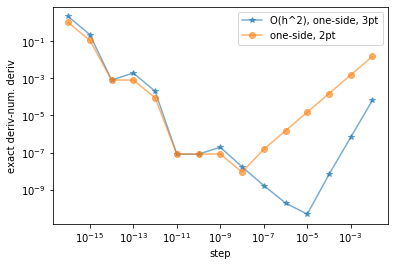

In [27]:
# ... ENTER YOUR CODE HERE ...
import matplotlib.pyplot as plt
import numpy as np


def deriv_2points(f,x,h):
    return (f(x+h)-f(x))/h

h = np.array([1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10,1e-11,1e-12,1e-13,1e-14,1e-15,1e-16])
deriv3 = np.empty_like(h)
deriv2 = np.empty_like(h)
for i in range(h.shape[0]):
    deriv3[i] = deriv(f,1.,h[i])
    deriv2[i] = deriv_2points(f, 1.,h[i])
plt.plot(h,abs(deriv3-fder(1.)),"-*", label="O(h^2), one-side, 3pt",alpha=0.6 )
plt.plot(h,abs(deriv2-fder(1.)), "o-", label="one-side, 2pt", alpha=0.6)
plt.xlabel("step")
plt.xscale("log")
plt.yscale("log")
plt.ylabel("exact deriv-num. deriv")
plt.legend()
plt.plot()

### Test I.3 

Now try differentiating $x^2 \log(x)$ at $x=0$. Use the three-point one-sided rule. Note that to evaluate the function at zero, you need to special-case this value. Check the scaling of the error with $h$, explain your results. 
(25% of the total grade)

In [33]:
def f(x):
    if x == 0:
        # the limit of $x^2 log(x)$ at $x-> 0$ is zero, even though log(x) is undefined at x=0
        return 0.0
    else:
        return x**2 * log(x)
    
def fder(x):
    if x == 0:
        return 0.0
    else:
        return x*(2*log(x) + 1)

x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(f, x, h) - fder(x)
    print("%5f -- %7.4g" % (h, err))

0.010000 -- -0.01386
0.001000 -- -0.001386
0.000100 -- -0.0001386
0.000010 -- -1.386e-05


... ENTER YOUR EXPLANATION HERE ...

Заметим, что сходимость теперь линейная, что в принципе разумно, так как у нас остаточный член получается из третьей производной, которая пропорциональная $\frac{1}{x}$. Соответственно эта штука идёт к нулю не как $\varepsilon^2$, а как $\varepsilon$

# Part II. Midpoint rule 

Write a function which computes a definite integral using the midpoint rule up to a given error, $\epsilon$. Estimate the error by comparing the estimates of the integral at $N$ and $2N$ elementary intervals. 

In [107]:
def midpoint_rule(func, a, b, eps):
    """ Calculate the integral of f from a to b using the midpoint rule.
    
    Parameters
    ----------
    func : callable
        The function to integrate.
    a : float
        The lower limit of integration.
    b : float
        The upper limit of integration.
    eps : float
        The target accuracy of the estimate.
        
    Returns
    -------
    integral : float
        The estimate of $\int_a^b f(x) dx$.
    """
    # ... ENTER YOUR CODE HERE ...
    i = 2
    Q_prev = func(a/2+b/2)*(b-a)
    while True:
        dots = np.linspace(a,b,2*i)
        points = (dots[1:]+dots[:-1])/2
        h = dots[1]-dots[0]
        Q_curr = h*np.sum(func(points))
        if abs(Q_curr-Q_prev)<eps:
            return Q_curr
        Q_prev = Q_curr
        i +=1


def midpoint_rule_tests(func, a, b, eps):
    """ Calculate the integral of f from a to b using the midpoint rule.
    
    Parameters
    ----------
    func : callable
        The function to integrate.
    a : float
        The lower limit of integration.
    b : float
        The upper limit of integration.
    eps : float
        The target accuracy of the estimate.
        
    Returns
    -------
    integral : float
        The estimate of $\int_a^b f(x) dx$.
    niter : int
        number of iterations
    """
    # ... ENTER YOUR CODE HERE ...
    i = 2
    Q_prev = func(a/2+b/2)*(b-a)
    while True:
        dots = np.linspace(a,b,2*i)
        points = (dots[1:]+dots[:-1])/2
        h = dots[1]-dots[0]
        Q_curr = h*np.sum(func(points))
        if abs(Q_curr-Q_prev)<eps:
            return [Q_curr, i]
        Q_prev = Q_curr
        i +=1


### Test II.1

Test your midpoint rule on a simple integral, which you can calculate by paper and pencil.

Compare the rate of convergence to the expected $O(N^{-2})$ scaling by studying the number of intervals required for a given accuracy $\epsilon$.

Compare the numerical results to the value you calculated by hand. Does the deviation agree with your estimate of the numerical error?
(20% of the total grade)


... ENTER YOUR CODE AND COMMENTS HERE ...

Отклонения не сходятся с реальными вычислениями, потому что условие выхода в принципе довольно необоснованное

In [101]:
print("Exact = {}, midpoint = {}, res = {}, niter = {}".format(0,midpoint_rule(lambda x: np.sin(x)**15,-1,1,1e-6),abs(0-midpoint_rule(lambda x: np.sin(x)**15,-1,1,1e-6)), midpoint_rule_tests(lambda x: np.sin(x)**15,-1,1,1e-6)[1]))
print("Exact = {}, midpoint = {}, res = {}, niter = {}".format(-62.03749646732900,midpoint_rule(lambda x: x**3+x**2+np.log(x+2)-32,-1,1,1e-6),abs(-62.03749646732900-midpoint_rule(lambda x: x**3+x**2+np.log(x+2)-32,-1,1,1e-6)),midpoint_rule_tests(lambda x: x**3+x**2+np.log(x+2)-32,-1,1,1e-6)[1]))
print("Exact = {}, midpoint = {}, res = {}, niter = {}".format(np.pi/3,midpoint_rule(lambda x: 1/(1+x**2),0,3**0.5,1e-6),abs(np.pi/3-midpoint_rule(lambda x: 1/(1+x**2),0,3**0.5,1e-6)),midpoint_rule_tests(lambda x: 1/(1+x**2),0,3**0.5,1e-6)[1]))

Exact = 0, midpoint = -1.3010426069826053e-18, res = 1.3010426069826053e-18, niter = 2
Exact = -62.037496467329, midpoint = -62.03752787428657, res = 3.140695756798095e-05, niter = 67
Exact = 1.0471975511965976, midpoint = 1.047208822256348, res = 1.127105975040621e-05, niter = 25


### Test II.2

Now use your midpoint rule to compute the value of

$$
\int_0^1\! \frac{\sin{\sqrt{x}}}{x}\, dx
$$

up to a predefined accuracy of $\epsilon=10^{-4}$.

Note that the integral contains an integrable singularity at the lower limit. Do calculations two ways: first, do a straightforward computation; next, subtract the singularity. Compare the number of iterations required to achieve the accuracy of $\epsilon$.

(30% of the total grade)

In [106]:
# ... ENTER YOUR CODE HERE ...
def func(x):
    return np.sin(x**0.5)/x


def func_mod(x):
    return func(x)-1/x**0.5


tup1 = midpoint_rule_tests(func,0,1,1e-4)
tup2 = midpoint_rule_tests(func_mod,0,1,1e-4)
print("Straightforward int = {}, niter = {}".format(tup1[0], tup1[1]))
print("Subsctract sing int = {}, niter = {}".format(tup2[0]+2., tup2[1]))

Straightforward int = 1.8591155544852964, niter = 168
Subsctract sing int = 1.8919128768112488, niter = 6


Во втором случае программа опять наврала на порядок, а в первом случае на два (относительно искомой точности)